In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

## Create the filtered dataframes

Create a filtered dataframe by selecting the rows that contain this specific keywords in the *title* column and *tags* column (and we don't save the description column).
- sport
- football
- soccer
- basketball
- fifa
- nba
- olympic
- gold
- tennis
- cricket
- formula1
- f1
- basketball
- nascar
- nfl
- world cup
- euro cup
- super bowl

In [4]:
parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)
 
# Initialize an empty DataFrame to store the filtered data
filtered_df = pd.DataFrame()

# keywords
keywords = ['sport', 'football', 'soccer', 'fifa', 'nba', 'olympic', 'golf', 'tennis', 'cricket', 'formula1', 'f1', 'basketball', 'nascar', 'nfl', 'world cup', 'eurocup', 'superbowl']

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas().drop(columns=['description'])
    temp_df = temp_df[temp_df.apply(lambda row: any(tag in row['tags'].lower() for tag in keywords) or any(tag in row['title'].lower() for tag in keywords), axis=1)]
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    print(f"Current size of filtered_df: {filtered_df.shape}")
    print(f"Memory usage of filtered_df: {filtered_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

Current size of filtered_df: (73003, 11)
Memory usage of filtered_df: 54.48 MB
Current size of filtered_df: (159250, 11)
Memory usage of filtered_df: 121.87 MB
Current size of filtered_df: (233147, 11)
Memory usage of filtered_df: 179.67 MB
Current size of filtered_df: (352209, 11)
Memory usage of filtered_df: 272.56 MB
Current size of filtered_df: (436206, 11)
Memory usage of filtered_df: 340.16 MB
Current size of filtered_df: (499530, 11)
Memory usage of filtered_df: 391.84 MB
Current size of filtered_df: (573522, 11)
Memory usage of filtered_df: 454.32 MB
Current size of filtered_df: (639314, 11)
Memory usage of filtered_df: 504.44 MB
Current size of filtered_df: (724509, 11)
Memory usage of filtered_df: 572.07 MB
Current size of filtered_df: (796620, 11)
Memory usage of filtered_df: 629.99 MB
Current size of filtered_df: (873644, 11)
Memory usage of filtered_df: 693.51 MB
Current size of filtered_df: (919763, 11)
Memory usage of filtered_df: 730.40 MB
Current size of filtered_df: (

In [5]:
filtered_df

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:18:45.197810,5.0,eKTH16a41QA,1070,24.0,"lego dinosaurs,lego jurssic world,lego jurassi...",Lego Dinosaurs Lego Jurassic World Dinosaur Tr...,2017-06-04 00:00:00,12760.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:49.741716,1.0,lWvsC0Jltgk,348,180.0,"marina del rey,sportsfishing,charter,fishing c...",Marina Del Rey Sportsfishing Charter - Catch S...,2016-02-09 00:00:00,9888.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:13.249229,83.0,39y4DoTezMc,360,2323.0,"livewell,live well,bait,fishing,fish,bluegill ...",Secret fish bait and $8 portable livewell,2015-09-22 00:00:00,304856.0
3,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:35.242542,20.0,-9AqA5zPmxU,31,130.0,"Pufferfish (Organism Classification),puffer fi...",Puffer fish fail! Puffer fish gets gas - funny...,2015-03-28 00:00:00,15250.0
4,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.349726,0.0,zO2iJKejdDo,116,47.0,"live bait,keep live bait alive,transporting li...",How to keep live bait alive while moving spots,2014-08-31 00:00:00,3646.0
...,...,...,...,...,...,...,...,...,...,...,...
5579451,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:25.143989,0.0,DHCIyAPrPF0,46,11.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",ये देश का चुनाव है। देश के चुनाव में सेना भी ह...,2019-04-26 00:00:00,149.0
5579452,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:16.213330,1.0,u0wVW82ymxA,122,14.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...","2014 में हेडलाइन बनती थी महंगाई, अब महंगाई पर ...",2019-04-26 00:00:00,270.0
5579453,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:32.418631,3.0,JthD2JtdUFw,639,55.0,"BJP,Bharatiya Janata Party,Narendra Modi,#Mann...",PM Modi pays tribute to Mahatma Gandhi On his ...,2019-10-01 00:00:00,1397.0
5579454,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:36.643996,12.0,lMGm3MDvbGk,62,210.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...","Pakistan thrives on conflict, can never welcom...",2019-09-28 00:00:00,3635.0


In [ ]:
print(filtered_df["categories"].unique()) # some videos don't have a category

['Gaming' 'Sports' 'Education' 'Howto & Style' 'Science & Technology'
 'People & Blogs' 'Music' 'Travel & Events' 'Pets & Animals'
 'Film & Animation' 'Entertainment' 'Comedy' 'Autos & Vehicles'
 'News & Politics' 'Nonprofits & Activism' '']


In [10]:
filtered_df.to_parquet("filtered_sport_metadata(by_tags_and_title)_without_description_column.parquet", engine="fastparquet")

# save the file without the gaming category
filtered_df[~filtered_df['categories'].str.contains('Gaming')].to_parquet(
    "filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet", engine="fastparquet")

### Read the file

In [11]:
# Read saved file
filtered_df = pd.read_parquet("filtered_sport_metadata(by_tags_and_title)_without_description_column.parquet", engine="fastparquet")

# filtered_df_without_gaming = pd.read_parquet("filtered_sport_metadata(by_tags_and_title)_without_description_column_and_gaming_category.parquet", engine="fastparquet")

## Analysis

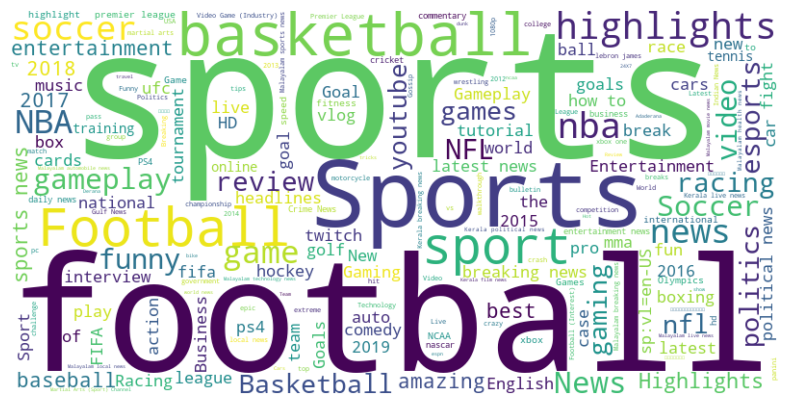

In [12]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_df['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

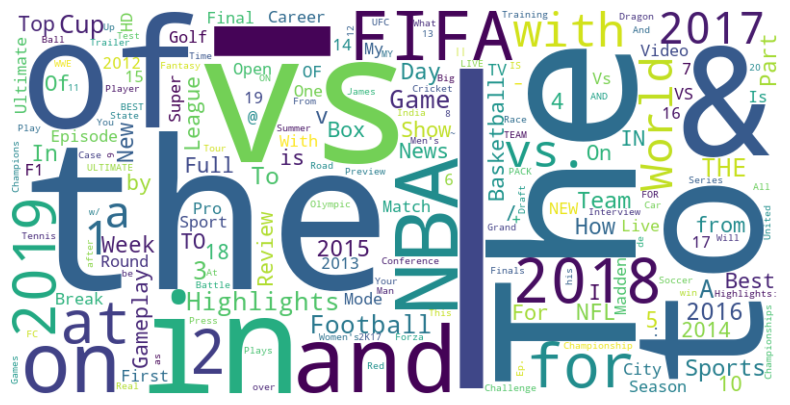

In [13]:
all_titles = [title for title in filtered_df['title'].str.split(' ').tolist() for title in title]

# Count the frequency of each tag
tag_counts = Counter(all_titles)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
filtered_df['upload_date'] = pd.to_datetime(filtered_df['upload_date'])
filtered_df['year'] = filtered_df['upload_date'].dt.year
filtered_df["month"] = filtered_df["upload_date"].dt.month
filtered_df['day'] = filtered_df['upload_date'].dt.day

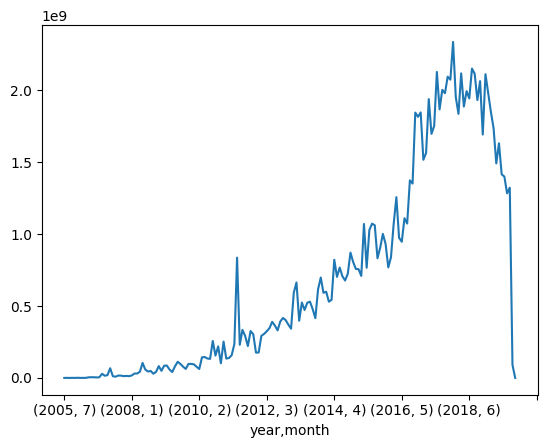

In [15]:
filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby(['year', 'month'])[
    'view_count'].sum().plot()

plt.show()

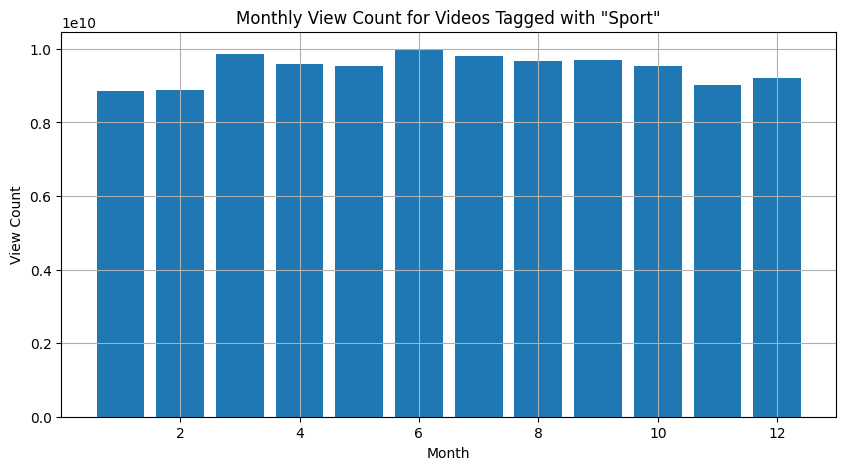

In [16]:

# Group the data by month and sum the view counts
monthly_views = filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby('month')['view_count'].sum()

# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(monthly_views.index, monthly_views.values)
plt.xlabel('Month')
plt.ylabel('View Count')
plt.title('Monthly View Count for Videos Tagged with "Sport"')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

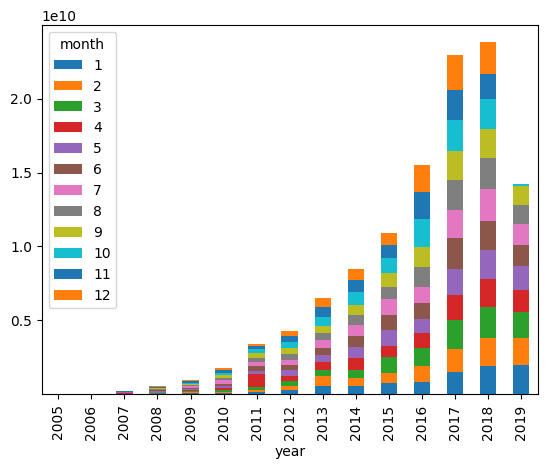

In [17]:

year_monthly_view = filtered_df[filtered_df['tags'].apply(lambda x: 'sport' in x)].groupby(["year", "month"])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))

year_monthly_view.unstack().plot(kind='bar', stacked=True)

plt.show()

In [18]:
def plot_view_counts_by_subject(filtered_df, subjects):
    # Filter the data for tags containing any of the subjects

    subject_data = filtered_df[filtered_df.apply(lambda row: any(subject.lower() in row['tags'].lower() for subject in subjects) or any(subject.lower() in row['title'].lower() for subject in subjects), axis=1)]

    # Group the data by year and month and sum the view counts
    year_monthly_view_subject = subject_data.groupby(['year', 'month'])['view_count'].sum()

    # Unstack the data to get a DataFrame suitable for plotting
    year_monthly_view_subject_unstacked = year_monthly_view_subject.unstack()

    # Plot the data
    plt.figure(figsize=(12, 6))
    for year in year_monthly_view_subject_unstacked.index:
        plt.plot(year_monthly_view_subject_unstacked.columns, year_monthly_view_subject_unstacked.loc[year], label=year)

    plt.xlabel('Month')
    plt.ylabel('View Count')
    plt.title(f'Monthly View Count for Videos Tagged with {", ".join(subjects)}')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()


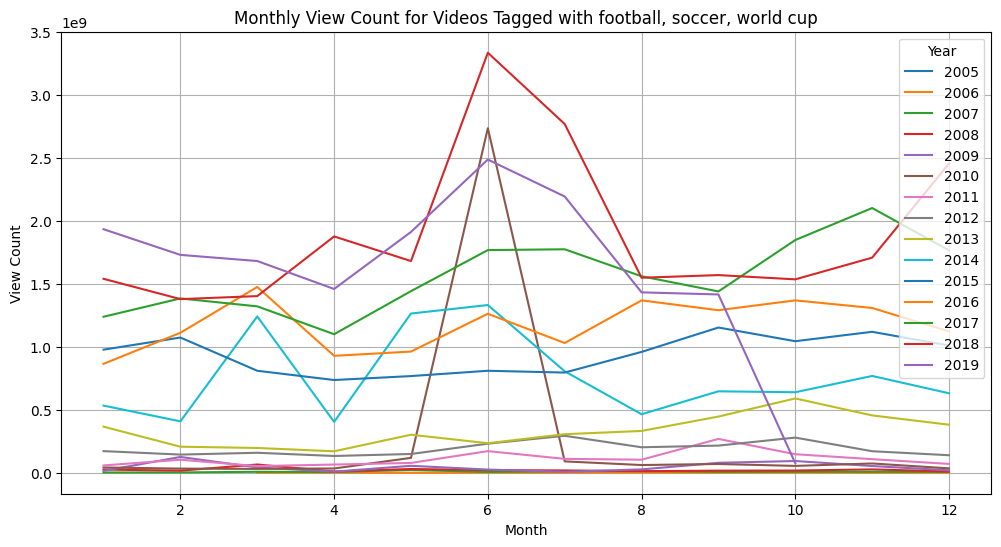

In [19]:
plot_view_counts_by_subject(filtered_df, ['football', 'soccer', 'world cup'])

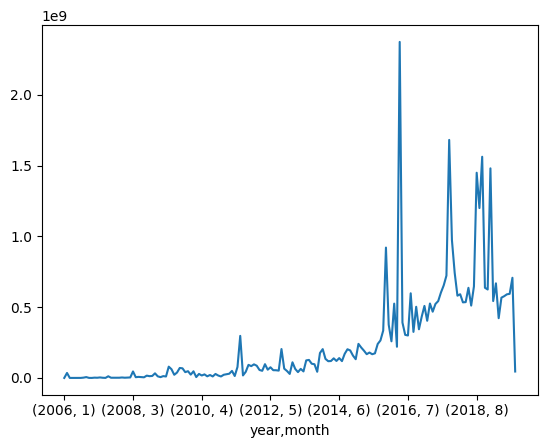

In [20]:
filtered_df[filtered_df['tags'].apply(lambda x: 'american football' in x or 'nfl' in x)].groupby(["year", "month"])[
    'view_count'].sum().plot()

plt.show()

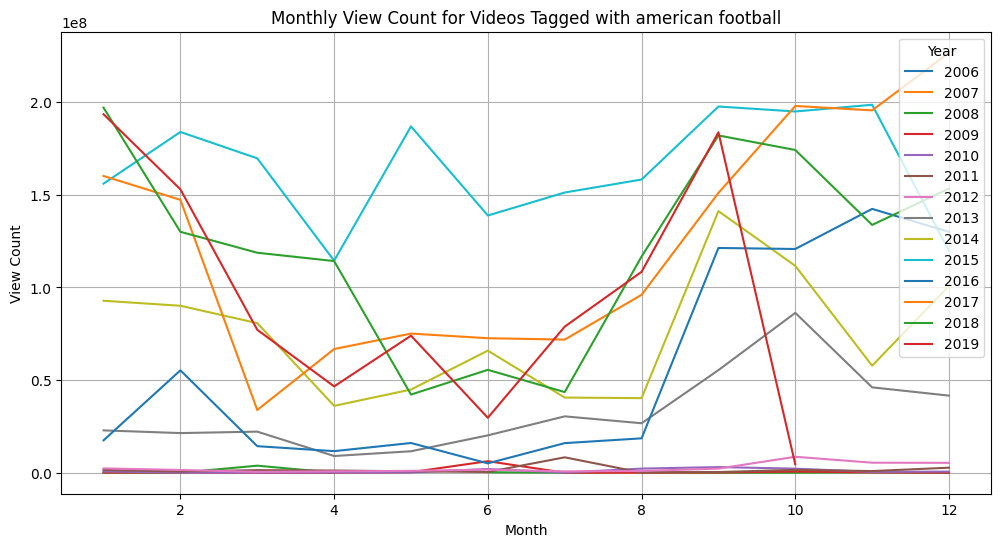

In [21]:
plot_view_counts_by_subject(filtered_df, ['american football'])

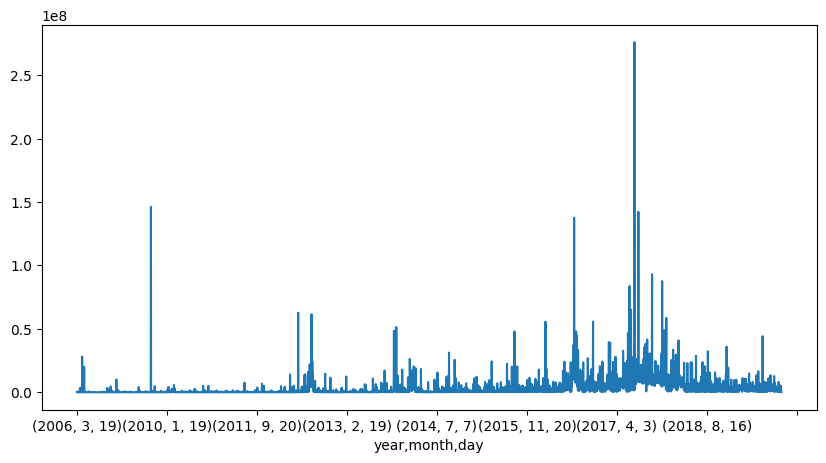

In [22]:
olympics_data = filtered_df[filtered_df['tags'].apply(lambda x: 'olympic' in x)].groupby(['year', 'month', 'day'])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))
olympics_data.plot()
plt.show()

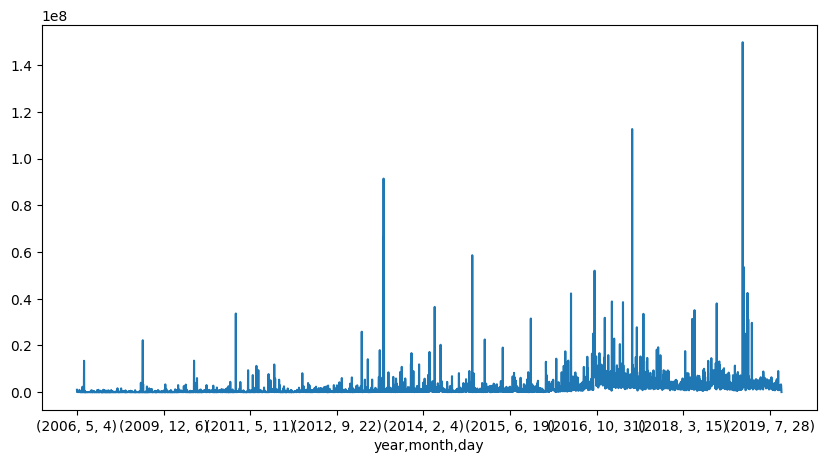

In [23]:
olympics_data = filtered_df[filtered_df['tags'].apply(lambda x: 'formula1' in x or 'f1' in x)].groupby(['year', 'month', 'day'])[
    'view_count'].sum()

plt.figure(figsize=(10, 5))
olympics_data.plot()
plt.show()

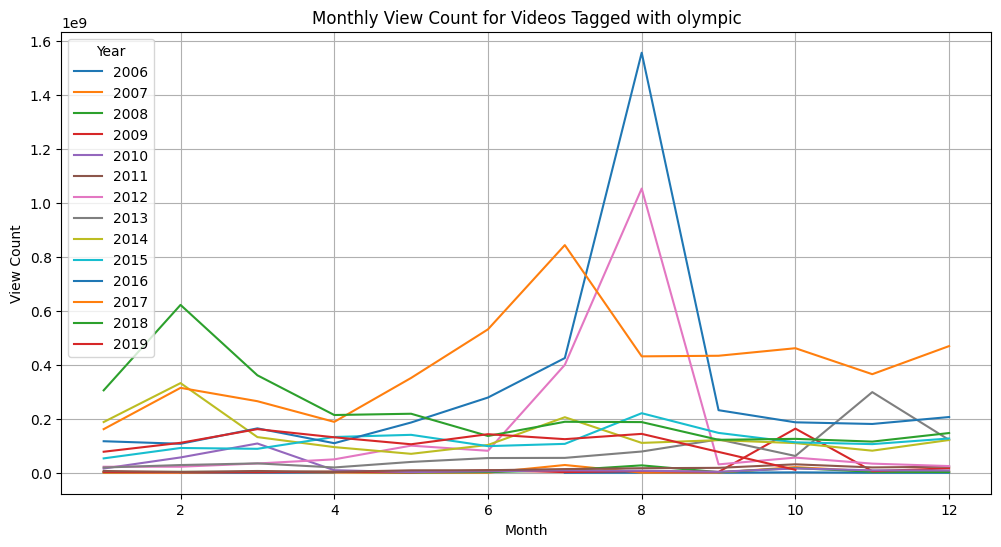

In [24]:

subjects = ['olympic']
plot_view_counts_by_subject(filtered_df, subjects)
